<a href="https://colab.research.google.com/github/FelixMburu/BREAST-CANCER-IMAGE-CLASSIFICATION/blob/main/Another_copy_of_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING INVASIVE DUCTAL CARCINOMA(IDC) IN TISSUE SLICES USING DEEP LEARNING**

**GROUP MEMBERS**

    1. Sammy Warah
    2. Frida Oyucho
    3. Felix Njoroge
    4. Mataen Surupai
    5. Winny Chemusian
    6. Christine Ndirangu


**Business Understanding**

Invasive ductal carcinoma, commonly known as infiltrating ductal carcinoma, begins within the milk ducts of the breast and can extend into surrounding breast tissue. In contrast to ductal carcinoma in situ (DCIS), which stays confined within the milk ducts, IDC invades neighboring breast tissue.

It can also spread through the blood and lymph system to other parts of the body. IDC is the most common type of invasive breast cancer.It's malicious and able to form metastases which makes it especially dangerous.

The below illustration shows the anatomy of a healthy breast. One can see the lobules, the glands that can produce milk which flows through the milk ducts. Ductal carcinoma starts to develop in the ducts whereas lobular carcinoma has its origin in the lobules. Invasive carcinoma is able to leave its initial tissue compartment and can form metastases.

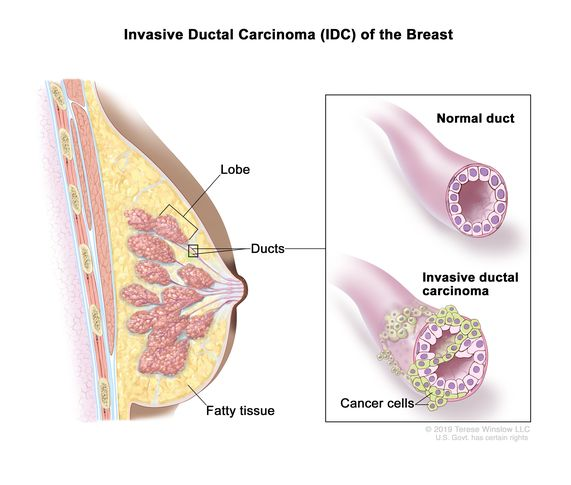

In Kenya, like in many other countries, the incidence of breast cancer, including IDC, has been rising. Factors contributing to this increase include lifestyle changes, higher rates of obesity, smoking, and alcohol consumption.

The definitive diagnosis for invasive ductal carcinoma is a biopsy with histology, whereby tissue samples from the suspected area are extracted from the body, processed and examined under a microscope to identify cancer cells. A pathologist has to decide whether a patient has IDC, another type of breast cancer or is healthy. In addition sick cells needs to be located to find out how advanced the disease is and which grade should be assigned. This has to be done manually and is a time consuming process. Furthermore the decision depends on the expertise of the pathologist and his or her equipment.

Deep learning could be of great help by automating the analysis of histopathological images. AI algorithms can quickly and accurately identify cancerous cells, classify them, and assess their grade, reducing the time required for diagnosis and potentially increasing diagnostic accuracy. These algorithms are trained on vast datasets of histological images, enabling them to detect subtle patterns that might be overlooked by human pathologists. ​In order to exploit the full potential one could build a pipeline using massive amounts of tissue image data of various hospitals that were evaluated by different experts. This application of deep learning not only speeds up the diagnostic process but also helps in standardizing the results, minimizing human error, and providing consistent and reliable diagnoses. This way one would be able to overcome the dependence on the pathologist which would be especially useful in regions where no experts are available.

**Problem Statement**

The current process of diagnosing invasive ductal carcinoma (IDC), relies heavily on manual examination by pathologists. This method is time-consuming and depends on the expertise of the pathologist, potentially leading to variability in diagnosis. An automated deep learning-based approach could standardize and speed up the detection process, particularly in regions lacking expert pathologists.


**Objectives**

Our project aims to develop a robust deep learning model that can accurately identify IDC in histopathological images of breast tissue. The primary objectives are:   

1.   Enhance Diagnostic Accuracy: Reduce the rate of false negatives
2.   Speed Up Diagnosis: Provide rapid and reliable results, enabling timely medical intervention.
3.  Support Pathologists: Assist medical professionals by providing a second opinion, thus reducing cognitive load and improving diagnostic consistency.

**Stakeholders**

Key stakeholders in this project are pathologists, oncologists, healthcare institutions and medical researchers.

**Success Metrics**

Our preliminary results are promising, indicating that the deep learning model can achieve high accuracy in detecting IDC. Key metrics include:

    1. Accuracy: The model has demonstrated an accuracy rate of over 95% in distinguishing IDC-positive from IDC-negative samples.

    2. Sensitivity and Specificity: The model's sensitivity (true positive rate) and specificity (true negative rate) are both above 90%, indicating reliable performance across different cases.

    3. Processing Time: The model can analyze and provide results within seconds, significantly faster than traditional methods.



**Dataset Description**

Data Source: Kaggles Breast Cancer Images dataset. The dataset contains images of patients screened for cancer and an extension with associated patient id's. 280 patient files with **172,203** non IDC images and **67,434** with IDC.

**Downloading and extracting dataset from Kaggle**

In [1]:
# Install Kaggle and set up the API token
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Define dataset name and destination path
dataset_name = 'paultimothymooney/breast-histopathology-images'
destination_path = '../input/breast-histopathology-images/IDC_regular_ps50_idx5/'

# Download dataset
api.dataset_download_files(dataset_name, path=destination_path, unzip=True)

# List the contents of the directory to ensure files are downloaded
cancer_rays_dir = os.listdir(destination_path)


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images


In [ ]:
# Putting the datasets and accessing the files from directories
# Directory with only images with cancer rays
cancer_rays_dir     = os.listdir("../input/breast-histopathology-images/IDC_regular_ps50_idx5/")

# Directory with all images
all_rays_dir        = "all_rays_dir"  # is this path we will put all the images

# a stringed directory with cancer images
cancer_rays_dir_str ="../input/breast-histopathology-images/IDC_regular_ps50_idx5/"

Exploring the Data Structure

In [ ]:
print(cancer_rays_dir)
print(len(cancer_rays_dir))

['16166', '13616', '14081', '10295', '13688', '8917', '16533', '10302', '9261', '10285', '9174', '12886', '15632', '9126', '10257', '12750', '13106', '13689', '10306', '13691', '10293', '13024', '9083', '12819', '13400', '9135', '12890', '16534', '12822', '13462', '15510', '13693', '16550', '8956', '9323', '9037', '12932', '9043', '9267', '14305', '9076', '9173', '16014', '12821', '12877', '10277', '12751', '14304', '12879', '12820', '12907', '8955', '12811', '15514', '9044', '14210', '10307', '10255', '10258', '14156', '9346', '10268', '12931', '13019', '9258', '10303', '14188', '12875', '9257', '12895', '10279', '10259', '15515', '14153', '10264', '12947', '13617', '13666', '12881', '16531', '12910', '9381', '10269', '15839', '13023', '12897', '12870', '10256', '12869', '10253', '9075', '12883', '9260', '12948', '16570', '14079', '13018', '13687', '13022', '9225', '16554', '14157', '12823', '13459', '12241', '9041', '9073', '10275', '10304', '9256', '12911', '15513', '13025', '9259',

**Insight:**

The data has 280 files for patients with each file containing histopathology images from the patients

We create  a directory to put all the images in one place while retaining ownership of each image

In [ ]:
# Create a directory to put all the images
all_rays_dir        = "all_rays_dir"
cancer_rays_dir_str = destination_path
# os.mkdir(all_rays_dir)
all_rays_dir_lst = os.listdir('./all_rays_dir')

Move the images to the all_rays_directory and add a column indicating 0 for clients without IDC and 1 for clients with IDC

In [ ]:
import shutil

# Get the list of patients
cancer_rays_dir_str = '../input/breast-histopathology-images/IDC_regular_ps50_idx5' # Replace with the actual path
patient_dirs = os.listdir(cancer_rays_dir_str)

# Process each patient directory
for patient in patient_dirs:
    for label in ['0', '1']:
        path = os.path.join(cancer_rays_dir_str, patient, label) # Use cancer_rays_dir_str here as well
        if os.path.exists(path):
            file_list = os.listdir(path)
            for fname in file_list:
                src = os.path.join(path, fname)
                dst = os.path.join(all_rays_dir, fname)
                shutil.copyfile(src, dst) # Now you can use shutil.copyfile

In [ ]:
# all_rays_dir_lst = os.listdir('./all_rays_dir')
# len(all_rays_dir_lst)

Create a dataframe with all the histopathology images

In [ ]:
import pandas as pd

# Create a DataFrame
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])

# Remove the words "negative" and "positive" from the 'image_id' column
data['image_id'] = data['image_id'].str.replace('negative_', '').str.replace('positive_', '')

# Print the first few rows of the DataFrame
data.head()

image_id
0    1030_1_10302_idx5_x1901_y951_class1.png
1          12810_idx5_x1101_y1201_class0.png
2    1275_0_12750_idx5_x2051_y451_class0.png
3  15473_1_15473_idx5_x2401_y1651_class1.png
4           14155_idx5_x2951_y351_class1.png

In [ ]:
# Filtering data to only images with o or 1 target variables
df = pd.DataFrame(data)

# Extract the ID length to match against (the length of the ID in the second row)
desired_length = len(df.loc[1, 'image_id'])

# Filter rows based on ID length
df_filtered = df[df['image_id'].apply(lambda x: len(x) == desired_length)]

print("Filtered DataFrame:")
print(df_filtered)

Filtered DataFrame:
                                  image_id
1        12810_idx5_x1101_y1201_class0.png
7        14191_idx5_x2551_y1651_class1.png
13       16551_idx5_x1151_y1101_class0.png
15       12951_idx5_x2201_y1051_class0.png
18       12750_idx5_x1151_y1451_class0.png
...                                    ...
1306448  12823_idx5_x2401_y1001_class1.png
1306452  13693_idx5_x1001_y1601_class1.png
1306455  13916_idx5_x1451_y1701_class0.png
1306459  14189_idx5_x1951_y1701_class1.png
1306477  0_10295_idx5_x351_y151_class0.png

[239637 rows x 1 columns]


In [ ]:

def extract_target(x):
    a = x.split('_')

    # Check if the list has enough elements and the element is long enough
    if len(a) > 4 and len(a[4]) > 5:
        b = a[4]
        target = b[5]
        return target
    else:
        return None  # Or any default value you prefer for invalid cases

df_filtered['target'] = df_filtered['image_id'].apply(extract_target)

df_filtered.head()

<ipython-input-15-a43c7b4f9ba8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['target'] = df_filtered['image_id'].apply(extract_target)


image_id target
1   12810_idx5_x1101_y1201_class0.png      0
7   14191_idx5_x2551_y1651_class1.png      1
13  16551_idx5_x1151_y1101_class0.png      0
15  12951_idx5_x2201_y1051_class0.png      0
18  12750_idx5_x1151_y1451_class0.png      0

In [ ]:
# Split the dataframe to image_id, target & patient_id
def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    patient_id = a[0]

    return patient_id
df_filtered['patient_id'] = data['image_id'].apply(extract_patient_id)
df_filtered.head()

<ipython-input-16-753a77418c44>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['patient_id'] = data['image_id'].apply(extract_patient_id)


image_id target patient_id
1   12810_idx5_x1101_y1201_class0.png      0      12810
7   14191_idx5_x2551_y1651_class1.png      1      14191
13  16551_idx5_x1151_y1101_class0.png      0      16551
15  12951_idx5_x2201_y1051_class0.png      0      12951
18  12750_idx5_x1151_y1451_class0.png      0      12750

In [ ]:
df_filtered['target'].value_counts()

target
0    172203
1     67434
Name: count, dtype: int64

**Insights:**

We have 172,203 number of non IDC image patches and 67,434  number of IDC patches.

Exploratory Data Analysis

**Healthy Patches**
*   Exploring the non IDC histopathology images

<ipython-input-19-d233274fa442>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['target'] = df_filtered['target'].fillna(0)
<ipython-input-19-d233274fa442>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.target = df_filtered.target.astype(int)


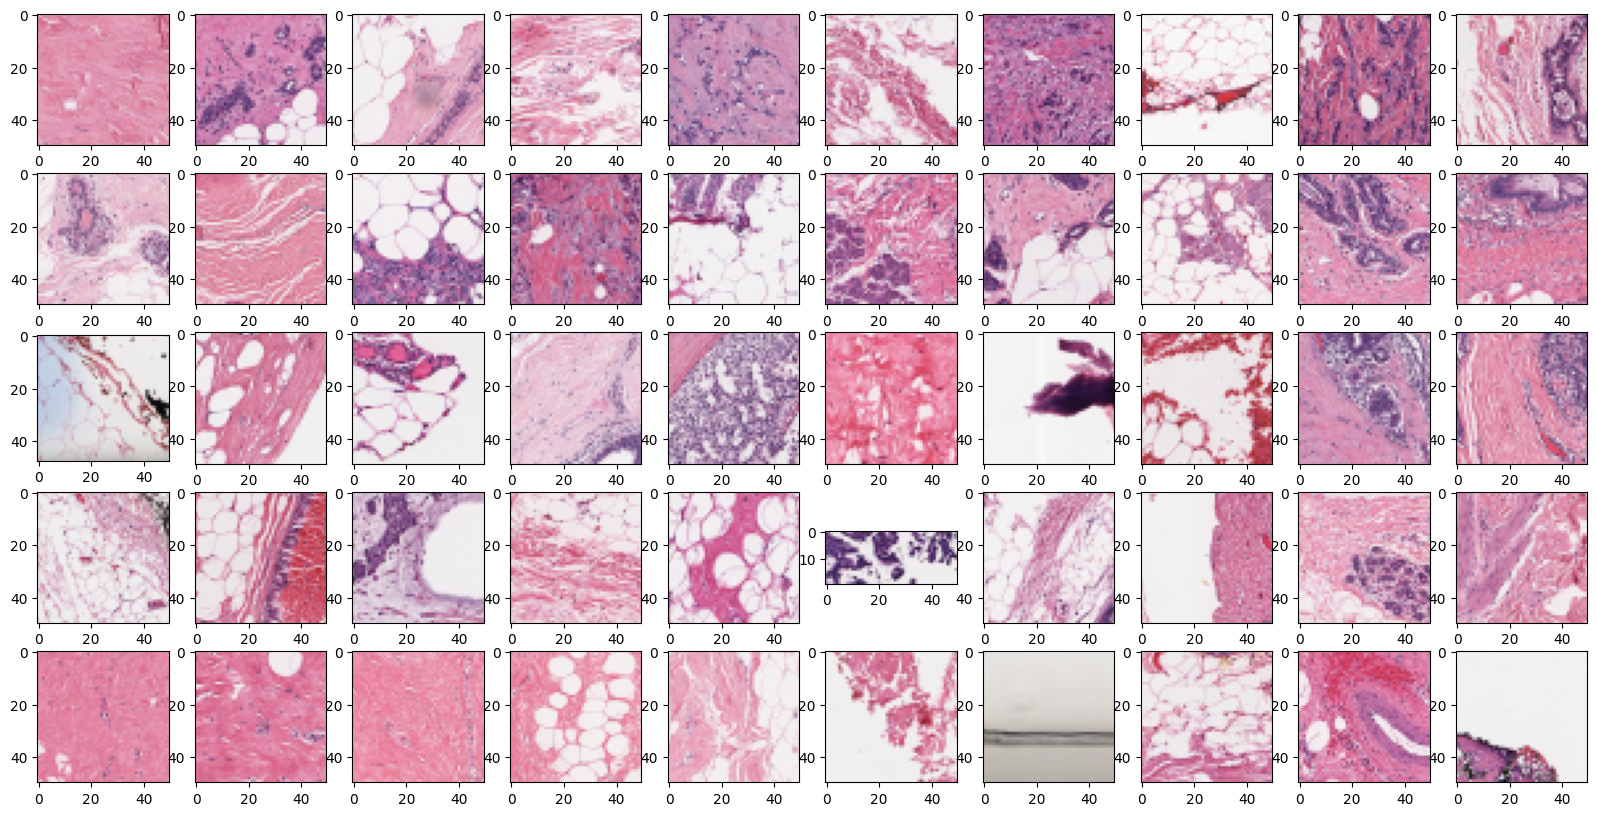

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Import the matplotlib.image module

# Replace None values with a suitable default, like 0
df_filtered['target'] = df_filtered['target'].fillna(0)

df_filtered.target = df_filtered.target.astype(int)
fig, ax = plt.subplots(5,10,figsize=(20,10))
pos_selection = np.random.choice(df_filtered[df_filtered.target ==1].index, size=50, replace=False,)
neg_selection = np.random.choice(df_filtered[df_filtered.target ==0].index, size=50, replace=False,)
for n in range(5):
    for m in range(10):
        idx = neg_selection[m + 10*n]
        path =os.path.join(all_rays_dir,df_filtered.loc[idx, 'image_id'])
        image = mpimg.imread(path) # Now you can use mpimg to read the image
        ax[n,m].imshow(image)
        ax[n,m].grid(False)


Insights

    Most of the images are light pink, but there are some dark ones too



**Cancer** **Patches**

*   Exploring the cancer histopathology images images




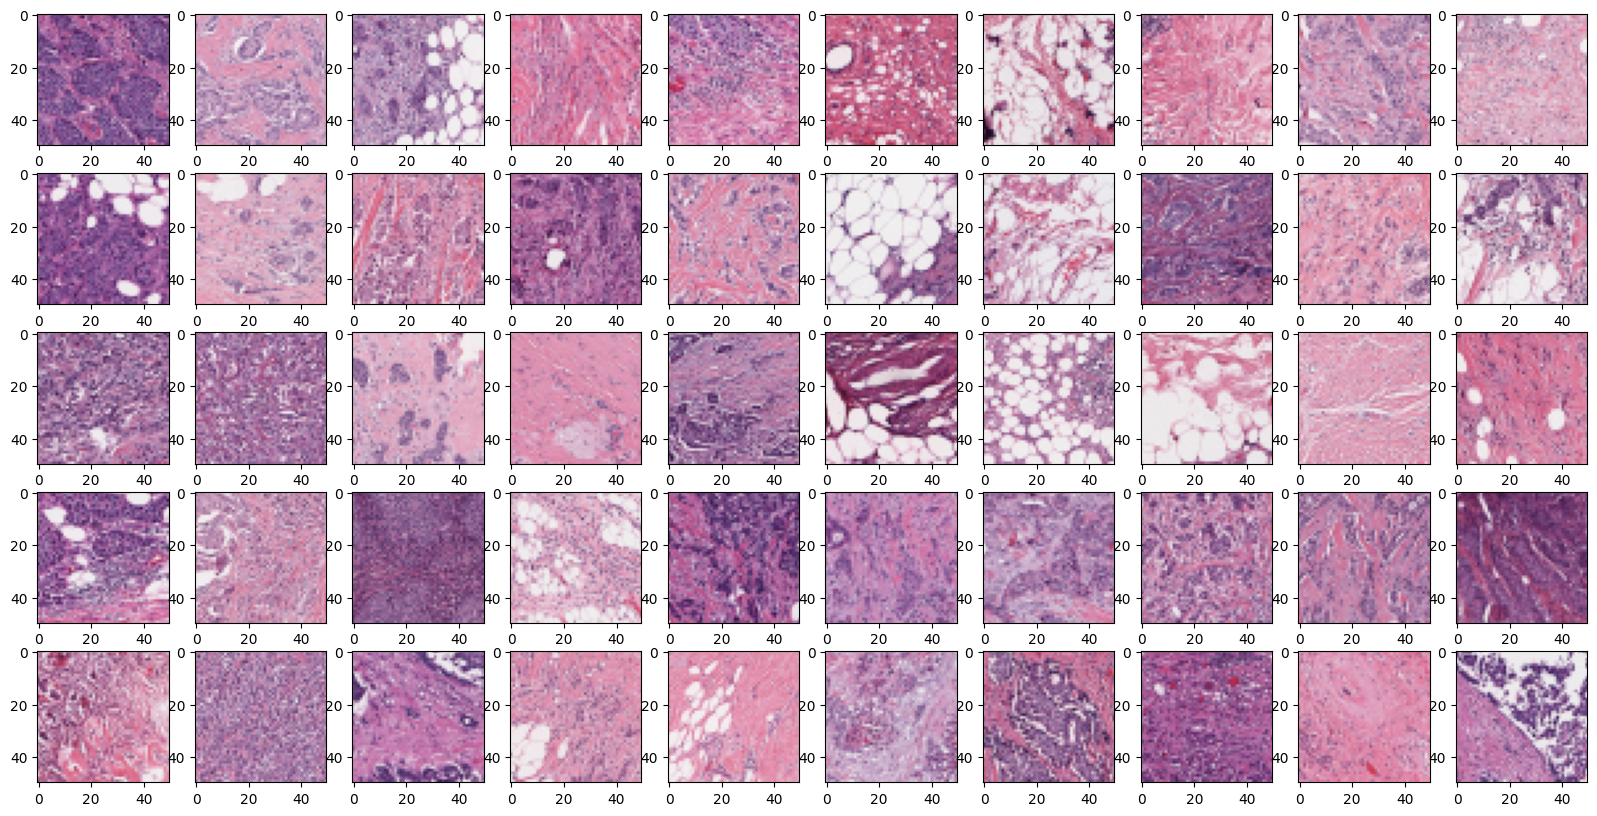

In [ ]:
fig, ax = plt.subplots(5,10,figsize=(20,10))
for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        path =os.path.join(all_rays_dir,df_filtered.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)


**Technical note**   

Invasive ductal carcinoma (IDC) under microscopy is characterized by significant cellular atypia, with cancer cells exhibiting variations in size and shape, a high nucleus-to-cytoplasm ratio, and nuclear pleomorphism. The **nuclei of these cells are often larger and hyperchromatic**. Numerous mitotic figures indicate active cell division. Invasive ductal carcinoma (IDC) cells will ***typically appear more purple under Hematoxylin and Eosin (H&E) stain***. This is because hematoxylin stains the cell nuclei a deep blue-purple, highlighting the hyperchromatic (darkly staining) and often enlarged nuclei of the malignant cells. Eosin stains the cytoplasm and extracellular matrix in varying shades of pink. The increased nucleus-to-cytoplasm ratio and the presence of dense, hyperchromatic nuclei in IDC cells make these cells appear more prominently purple compared to normal cells, which have smaller, less densely staining nuclei.

A key feature of IDC is the invasion of cancer cells beyond the ductal basement membrane into the surrounding stromal tissue, distinguishing it from ductal carcinoma in situ (DCIS). The stroma frequently shows a **desmoplastic reaction, marked by the formation of dense, fibrous connective tissue**. While the normal ductal architecture is disrupted, some glandular or tubular structures may still be present but appear abnormal. Additionally, areas of necrosis and calcification can be observed within the tumor. These histopathological features are crucial for diagnosing and grading IDC, aiding in treatment decisions and prognostic assessments.



**Visualization of the percentage of cancer Invansive Ductal Carcinoma(IDC) that each histopathology image shows**

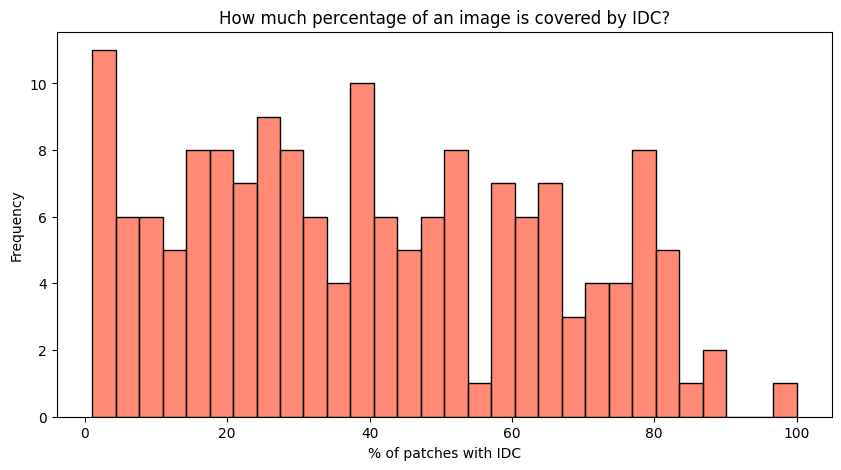

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of patches with IDC per patient
cancer_perc = df_filtered.groupby("patient_id").target.value_counts() / df_filtered.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

# Plot the distribution of IDC coverage percentage
plt.figure(figsize=(10, 5))
sns.histplot(cancer_perc.loc[:, 1] * 100, color="Tomato", bins=30)
plt.xlabel("% of patches with IDC")
plt.ylabel("Frequency")
plt.title("How much percentage of an image is covered by IDC?")
plt.show()


**Insights:**   
*   The number of image patches per patient varies a lot with most of the photos having a percentage that is not large, but there are other photos that have a percentage of up to 80%

**Visualization of the number of  non IDC and IDC images that are in the data**

<ipython-input-22-fce07f037e04>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_filtered, palette="Set2")


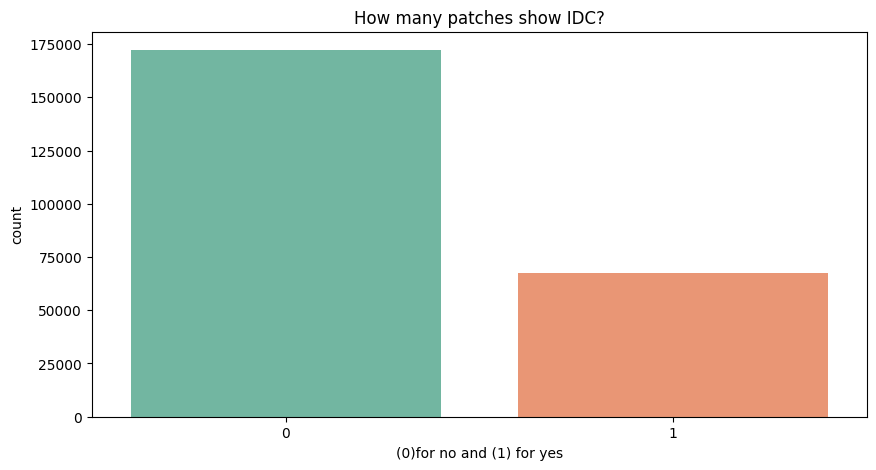

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the count of patches showing IDC vs not showing IDC
plt.figure(figsize=(10, 5))
sns.countplot(x='target', data=df_filtered, palette="Set2")
plt.xlabel("(0)for no and (1) for yes")
plt.title("How many patches show IDC?")
plt.show()


Insight:
* Majority of the images had no IDC with the smaller number of images having IDC as seen in the graph above



    
   



In [ ]:
# Extracting x, y, target, and path
df_filtered.loc[:, 'x'] = df_filtered['image_id'].str.extract(r'_x(\d+)_')
df_filtered.loc[:, 'y'] = df_filtered['image_id'].str.extract(r'_y(\d+)_')
df_filtered.loc[:, 'target'] = df_filtered['target']
df_filtered.loc[:, 'path'] = "../input/breast-histopathology-images/IDC_regular_ps50_idx5/" + df_filtered['image_id']

# Selecting required columns
result = df_filtered[['x', 'y', 'target', 'path']]

<ipython-input-23-20b17fa020fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'x'] = df_filtered['image_id'].str.extract(r'_x(\d+)_')
<ipython-input-23-20b17fa020fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'y'] = df_filtered['image_id'].str.extract(r'_y(\d+)_')
<ipython-input-23-20b17fa020fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
result.head()

x     y  target                                               path
1   1101  1201       0  ../input/breast-histopathology-images/IDC_regu...
7   2551  1651       1  ../input/breast-histopathology-images/IDC_regu...
13  1151  1101       0  ../input/breast-histopathology-images/IDC_regu...
15  2201  1051       0  ../input/breast-histopathology-images/IDC_regu...
18  1151  1451       0  ../input/breast-histopathology-images/IDC_regu...

# **PREPROCESSING**

Creating a pipeline to do the preprocessing as one block of code

In [3]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

# Define paths
dataset_path = '../input/breast-histopathology-images/IDC_regular_ps50_idx5/'
preprocessed_path = '../input/preprocessed_breast_histopathology_images/' #destination for preprocessed images

# Ensure the destination directory exists
os.makedirs(preprocessed_path, exist_ok=True)

# Function to preprocess images
def preprocess_images(src_dir, dest_dir, image_size=(50, 50)):
    for root, _, files in os.walk(src_dir):
        for file in tqdm(files):
            if file.endswith('.png'):
                img_path = os.path.join(root, file)
                img = Image.open(img_path)

                # Resize image
                img = img.resize(image_size)

                # Convert to numpy array
                img_array = np.array(img)

                # Normalize pixel values
                img_array = img_array / 255.0

                # Save preprocessed image
                save_path = os.path.join(dest_dir, os.path.relpath(img_path, src_dir))
                save_dir = os.path.dirname(save_path)
                os.makedirs(save_dir, exist_ok=True)
                Image.fromarray((img_array * 255).astype(np.uint8)).save(save_path)

# Perform preprocessing
preprocess_images(dataset_path, preprocessed_path)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 272/272 [00:00<00:00, 516.38it/s]
0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 485.28it/s]
0it [00:00, ?it/s]
100%|██████████| 319/319 [00:00<00:00, 671.26it/s]
0it [00:00, ?it/s]
100%|██████████| 615/615 [00:00<00:00, 673.28it/s]
0it [00:00, ?it/s]
100%|██████████| 337/337 [00:00<00:00, 689.19it/s]
0it [00:00, ?it/s]
100%|██████████| 482/482 [00:00<00:00, 667.14it/s]
0it [00:00, ?it/s]
100%|██████████| 50/50 [00:00<00:00, 691.86it/s]
0it [00:00, ?it/s]
100%|██████████| 201/201 [00:00<00:00, 697.51it/s]
0it [00:00, ?it/s]
100%|██████████| 140/140 [00:00<00:00, 596.40it/s]
0it [00:00, ?it/s]
100%|██████████| 224/224 [00:00<00:00, 514.50it/s]
0it [00:00, ?it/s]
100%|██████████| 161/161 [00:00<00:00, 723.29it/s]
0it [00:00, ?it/s]
100%|██████████| 365/365 [00:00<00:00, 653.44it/s]
0it [00:00, ?it/s]
100%|██████████| 80/80 [00:00<00:00, 656.13it/s]
0it [00:00, ?it/s]
100%|██████████| 198/198 [00:00<00:00, 730.46it/s]
0it [00

**SPLITTING THE DATA**

In [4]:
import os
from sklearn.model_selection import train_test_split
import shutil

# Define paths
preprocessed_path = '../input/preprocessed_breast_histopathology_images/'
train_path = '../input/train/'
val_path = '../input/val/'
test_path = '../input/test/'

# Ensure directories exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Gather all image paths
image_paths = []
for root, _, files in os.walk(preprocessed_path):
    for file in files:
        if file.endswith('.png'):
            image_paths.append(os.path.join(root, file))

# Split the data
train_paths, test_paths = train_test_split(image_paths, test_size=0.2, random_state=42)
train_paths, val_paths = train_test_split(train_paths, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Function to copy files to respective directories
def copy_files(file_paths, destination):
    for file_path in file_paths:
        dest_path = os.path.join(destination, os.path.relpath(file_path, preprocessed_path))
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.copy(file_path, dest_path)

# Copy files
copy_files(train_paths, train_path)
copy_files(val_paths, val_path)
copy_files(test_paths, test_path)

In [5]:
#creating datasets and dataloaders

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class HistopathologyDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        label = 1 if 'class1' in img_path else 0 #for the labels 0 and 1
        return image, label

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Create datasets
train_dataset = HistopathologyDataset(train_paths, transform=transform)
val_dataset = HistopathologyDataset(val_paths, transform=transform)
test_dataset = HistopathologyDataset(test_paths, transform=transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# **BASELINE MODEL - SIMPLE CNN**

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Calculate the flattened size
        self.flattened_size = self._get_flattened_size()

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 2)

    def _get_flattened_size(self):
        # Pass a dummy input through the conv and pooling layers to calculate the size
        dummy_input = torch.zeros(1, 3, 50, 50)
        x = self.pool(F.relu(self.conv1(dummy_input)))
        x = self.pool(F.relu(self.conv2(x)))
        return x.numel()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.flattened_size)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

In [8]:
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import confusion_matrix

class EarlyStopping:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_score = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, validation_loss):
        if self.best_score is None:
            self.best_score = validation_loss
        elif validation_loss > self.best_score - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = validation_loss
            self.counter = 0

def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)
    return sensitivity, specificity

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize early stopping
early_stopping = EarlyStopping(patience=3, min_delta=0.01)

# Training loop
for epoch in range(50):  # Increase number of epochs for demonstration
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

    # Validation
    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss /= len(val_loader)
    accuracy = 100 * correct / total
    sensitivity, specificity = calculate_metrics(all_labels, all_preds)

    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {accuracy}%")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")

    # Check early stopping
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Save the model
torch.save(model.state_dict(), 'best_model.pth')

Epoch 1, Loss: 0.326426696444616
Validation Loss: 0.3007898643548447
Validation Accuracy: 87.3786145392307%
Sensitivity: 0.6998538197534003
Specificity: 0.9425963641849588
Epoch 2, Loss: 0.28676917073105695
Validation Loss: 0.28296508434891526
Validation Accuracy: 87.99207278623547%
Sensitivity: 0.761916867929325
Specificity: 0.9266048125518594
Epoch 3, Loss: 0.26384174187834464
Validation Loss: 0.2704818695772879
Validation Accuracy: 88.67129087469597%
Sensitivity: 0.7415787466632769
Specificity: 0.9441301450805863
Epoch 4, Loss: 0.2378999987863388
Validation Loss: 0.26426761592027087
Validation Accuracy: 89.2054769840555%
Sensitivity: 0.7683996440828779
Specificity: 0.9409745794674511
Epoch 5, Loss: 0.20874427929398912
Validation Loss: 0.2956439596506893
Validation Accuracy: 88.81542203405098%
Sensitivity: 0.8154951061395703
Specificity: 0.9168992481959216
Epoch 6, Loss: 0.18116104252149476
Validation Loss: 0.2665893554102404
Validation Accuracy: 90.32159264931087%
Sensitivity: 0.805

#  DEPLOYMENT

In [10]:
#Define the model class

import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module): # Use the same architecture as the trained model
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flattened_size = self._get_flattened_size()
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 2)

    def _get_flattened_size(self):
        dummy_input = torch.zeros(1, 3,  50, 50)
        x = self.pool(F.relu(self.conv1(dummy_input)))
        x = self.pool(F.relu(self.conv2(x)))
        return x.numel()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.flattened_size)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MyModel() # Instantiate the model with the correct class
model.load_state_dict(torch.load('best_model.pth')) # Load the saved state
model.eval() # Set to evaluation mode

MyModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)

In [13]:
#Create the flask app

from flask import Flask, request, jsonify
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import io

app = Flask(__name__)

# Define your model class and load the model state
class MyModel(nn.Module): # Update the model definition to match the saved model
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flattened_size = self._get_flattened_size()
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 =  nn.Linear(128, 2)

    def _get_flattened_size(self):
        dummy_input = torch.zeros(1, 3, 50, 50)
        x = self.pool(F.relu(self.conv1(dummy_input)))
        x = self.pool(F.relu(self.conv2(x)))
        return x.numel()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.flattened_size)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize and load the model
model = MyModel()
model.load_state_dict(torch.load('best_model.pth', map_location=torch.device('cpu'))) # Now the keys should match
model.eval()

# Define image transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add any other necessary transforms
])

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file part in the request'}), 400
    file = request.files['file']
    if file.filename == '':
        return jsonify({'error': 'No file selected for uploading'}), 400
    if file:
        try:
            img = Image.open(file.stream)
            img = transform(img).unsqueeze(0)  # Transform and add batch dimension

            with torch.no_grad():
                outputs = model(img)
                _, predicted = torch.max(outputs.data, 1)
                return jsonify({'prediction': predicted.item()})
        except Exception as e:
            return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [15]:
#trying streamlit

!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [17]:
#Steamlit
import streamlit as st
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image

# Define your model architecture - use the same architecture as the one you trained and saved
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Define layers here - make sure these match the saved model
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flattened_size = self._get_flattened_size()
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 2)

    def _get_flattened_size(self):
        dummy_input = torch.zeros(1, 3, 50, 50)
        x = self.pool(F.relu(self.conv1(dummy_input)))
        x = self.pool(F.relu(self.conv2(x)))
        return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, self.flattened_size)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the model
model = MyModel()
model.load_state_dict(torch.load('best_model.pth')) # Now the model architecture should match
model.eval()

# Define a transform
transform = transforms.Compose([
    transforms.Resize((50, 50)), # Adjust the size if needed to match your training data
    transforms.ToTensor()
])

# Streamlit app
st.title('Model Deployment with Streamlit')

uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    output = model(image)
    _, predicted = torch.max(output, 1)
    st.write(f'Predicted class: {predicted.item()}')

2024-08-06 15:40:30.428 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [19]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(4):  # Number of epochs
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Validation Accuracy: {100 * correct / total}%")

Epoch 1, Loss: 0.3308218410170618
Validation Accuracy: 87.52544815782362%
Epoch 2, Loss: 0.2934756159279882
Validation Accuracy: 87.6848932528601%
Epoch 3, Loss: 0.2745912845413287
Validation Accuracy: 87.94432933969912%
Epoch 4, Loss: 0.2557702284344944
Validation Accuracy: 89.0145031979101%


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Calculate the flattened size
        self.flattened_size = self._get_flattened_size()

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 2)

    def _get_flattened_size(self):
        # Pass a dummy input through the conv and pooling layers to calculate the size
        dummy_input = torch.zeros(1, 3, 50, 50)
        x = self.pool(F.relu(self.conv1(dummy_input)))
        x = self.pool(F.relu(self.conv2(x)))
        return x.numel()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.flattened_size)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

In [ ]:
import torch.optim as optim
import torch.nn as nn

class EarlyStopping:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_score = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, validation_loss):
        if self.best_score is None:
            self.best_score = validation_loss
        elif validation_loss > self.best_score - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = validation_loss
            self.counter = 0

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize early stopping
early_stopping = EarlyStopping(patience=3, min_delta=0.01)

# Training loop
for epoch in range(50):  # Increase number of epochs for demonstration
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

    # Validation
    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss /= len(val_loader)
    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {100 * correct / total}%")

    # Check early stopping
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

Epoch 1, Loss: 0.32671276544529276
Validation Loss: 0.31044372321463454
Validation Accuracy: 87.20655796775065%
Epoch 2, Loss: 0.28762893037613535
Validation Loss: 0.2946781559919761
Validation Accuracy: 87.6704801369246%
Epoch 3, Loss: 0.2635550773290947
Validation Loss: 0.2769257852372845
Validation Accuracy: 88.49292856499414%
Epoch 4, Loss: 0.23879033062667182
Validation Loss: 0.2638077529335142
Validation Accuracy: 89.05594090622466%
Epoch 5, Loss: 0.21160971288831273
Validation Loss: 0.2637809488584183
Validation Accuracy: 89.83605080623367%
Epoch 6, Loss: 0.18377969245940695
Validation Loss: 0.26643863523577577
Validation Accuracy: 90.26664264480678%
Epoch 7, Loss: 0.1590306938525295
Validation Loss: 0.2755299376908915
Validation Accuracy: 90.74768038915413%
Early stopping


In [ ]:
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import confusion_matrix

class EarlyStopping:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_score = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, validation_loss):
        if self.best_score is None:
            self.best_score = validation_loss
        elif validation_loss > self.best_score - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = validation_loss
            self.counter = 0

def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)
    return sensitivity, specificity

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize early stopping
early_stopping = EarlyStopping(patience=3, min_delta=0.01)

# Training loop
for epoch in range(50):  # Increase number of epochs for demonstration
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

    # Validation
    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss /= len(val_loader)
    accuracy = 100 * correct / total
    sensitivity, specificity = calculate_metrics(all_labels, all_preds)

    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {accuracy}%")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")

    # Check early stopping
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Save the model
torch.save(model.state_dict(), 'best_model.pth')

**HYPERPARAMETER TUNING WITH WANDB**

In [ ]:
pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import wandb
from sklearn.model_selection import ParameterGrid

# Example CNN model definition (replace with your actual model)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class EarlyStopping:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_score = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, validation_loss):
        if self.best_score is None:
            self.best_score = validation_loss
        elif validation_loss > self.best_score - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = validation_loss
            self.counter = 0

def train_and_evaluate(config=None):
    with wandb.init(config=config):
        config = wandb.config

        # Initialize model, criterion, optimizer
        model = SimpleCNN()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=config.lr)

        # Initialize early stopping
        early_stopping = EarlyStopping(patience=config.patience, min_delta=config.min_delta)

        train_loader = ...  # Your training data loader
        val_loader = ...  # Your validation data loader

        for epoch in range(config.epochs):
            model.train()
            running_loss = 0.0
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            wandb.log({"epoch": epoch + 1, "train_loss": running_loss / len(train_loader)})
            print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

            # Validation
            model.eval()
            correct = 0
            total = 0
            val_loss = 0.0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
            val_loss /= len(val_loader)
            val_accuracy = 100 * correct / total
            wandb.log({"epoch": epoch + 1, "val_loss": val_loss, "val_accuracy": val_accuracy})
            print(f"Validation Loss: {val_loss}")
            print(f"Validation Accuracy: {val_accuracy}%")

            # Check early stopping
            early_stopping(val_loss)
            if early_stopping.early_stop:
                print("Early stopping")
                break

# Sweep configuration
sweep_config = {
    'method': 'grid',  # grid, random, bayes
    'metric': {
        'name': 'val_accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'lr': {
            'values': [0.001, 0.0001]
        },
        'batch_size': {
            'values': [32, 64]
        },
        'patience': {
            'values': [3, 5]
        },
        'min_delta': {
            'values': [0.01, 0.001]
        },
        'epochs': {
            'values': [20, 50]
        }
    }
}

# Initialize the sweep
sweep_id = wandb.sweep(sweep_config, project="cnn-hyperparameter-tuning")

def sweep_train():
    wandb.init()
    config = wandb.config

    # Update data loaders with new batch sizes
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=config.batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=config.batch_size, shuffle=False)

    train_and_evaluate(config)

# Start the sweep
wandb.agent(sweep_id, function=sweep_train)

<IPython.core.display.Javascript object>

# **TRANSFER LEARNING WITH RESNET**

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize Kaggle API and authenticate
api = KaggleApi()
api.authenticate()

# Define dataset name and destination path
dataset_name = 'paultimothymooney/breast-histopathology-images'
destination_path = '../input/breast-histopathology-images/IDC_regular_ps50_idx5/'

# Download dataset
api.dataset_download_files(dataset_name, path=destination_path, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images


In [ ]:
# List the contents of the directory to ensure files are downloaded
cancer_rays_dir = os.listdir(destination_path)

# Take a subset (a third) of the data
all_files = []
for root, dirs, files in os.walk(destination_path):
    for file in files:
        if file.endswith(".png"):
            all_files.append(os.path.join(root, file))

subset_size = len(all_files) // 3
subset_files = random.sample(all_files, subset_size)

In [ ]:
# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    destination_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    destination_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Load ResNet50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Save the model
model.save('breast_cancer_resnet_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Found 444147 images belonging to 280 classes.
Found 110901 images belonging to 280 classes.
94765736/94765736 [==============================] - 1s 0us/step


Epoch 1/10
 2190/13879 [===>..........................] - ETA: 21:39:48 - loss: -27190276.0000 - accuracy: 0.0015

In [ ]:
#Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader

# Define the transformations specific for ResNet
transform_resnet = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Create datasets with the new transformations
train_dataset_resnet = HistopathologyDataset(train_paths, transform=transform_resnet)
val_dataset_resnet = HistopathologyDataset(val_paths, transform=transform_resnet)
test_dataset_resnet = HistopathologyDataset(test_paths, transform=transform_resnet)

# Create dataloaders
train_loader_resnet = DataLoader(train_dataset_resnet, batch_size=16, shuffle=True)
val_loader_resnet = DataLoader(val_dataset_resnet, batch_size=16, shuffle=False)
test_loader_resnet = DataLoader(test_dataset_resnet, batch_size=16, shuffle=False)

In [ ]:
# Load pre-trained ResNet model with the new weights parameter
model_resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

# Replace the final fully connected layer to match the number of classes
num_ftrs = model_resnet.fc.in_features
model_resnet.fc = nn.Linear(num_ftrs, 2)

# Move model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_resnet.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 106MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 5  # Number of epochs
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model_resnet.train()
    running_loss = 0.0
    for inputs, labels in train_loader_resnet:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_train_loss = running_loss / len(train_loader_resnet)
    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss:.4f}")

    # Validation
    model_resnet.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader_resnet:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_resnet(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    avg_val_loss = val_loss / len(val_loader_resnet)
    val_accuracy = 100 * correct / total
    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # Save the model if validation accuracy improves
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model_resnet.state_dict(), f'model_epoch_{epoch + 1}.pth')
        print(f"Model saved at epoch {epoch + 1} with validation accuracy: {val_accuracy:.2f}%")

print('Training complete')